**INTRODUCTION**

The provided code demonstrates a comprehensive analysis of time series data using Python, focusing on forecasting and modeling techniques. The objective of this analysis is to explore various methods for time series forecasting and assess their performance. Here's an introduction to the different sections and their objectives:

1. **Data Collection and Visualization (Yahoo Finance):**
   - Objective: Download historical stock price data for Hindustan Unilever (HUL) from Yahoo Finance and visualize the closing prices over time using Plotly.

2. **Time Series Decomposition (Additive and Multiplicative):**
   - Objective: Decompose the time series data into its trend, seasonal, and residual components using both additive and multiplicative methods. Interpret the components to gain insights into the underlying patterns.

3. **Stationarity Testing (ADF and KPSS):**
   - Objective: Assess the stationarity of the time series data using the Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. Determine whether differencing is required to make the data stationary.

4. **Differencing to Achieve Stationarity:**
   - Objective: Apply differencing to the time series data to achieve stationarity. Calculate and visualize the first-order differenced data.

5. **Autocorrelation and Partial Autocorrelation Analysis:**
   - Objective: Analyze autocorrelation and partial autocorrelation functions to determine the orders (p and q) for an AutoARIMA model.

6. **AutoARIMA Modeling:**
   - Objective: Fit an AutoARIMA model to the differenced data, select the appropriate orders (p, d, q), and make predictions. Evaluate the model's performance.

7. **Exponential Smoothing (Additive and Multiplicative):**
   - Objective: Apply additive and multiplicative exponential smoothing models to the original time series data, forecast future values, and assess the forecasting accuracy.

8. **GARCH Model (Volatility Forecasting):**
   - Objective: Implement a GARCH(1,1) model to estimate conditional volatility in stock returns. Evaluate the model's performance and visualize actual returns vs. conditional volatility.

9. **LSTM Neural Network for Price Prediction:**
   - Objective: Build an LSTM (Long Short-Term Memory) neural network model to predict stock prices. Train the model, make predictions, and calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

10. **Conclusion and Summary:**
    - Objective: Summarize the key findings, compare the forecasting methods, and provide insights into the performance of each approach.

# **Data Collection and Visualization (Yahoo Finance):**

In [ ]:
# Handles warnings and sets a filter on warnings to ignore them
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Interface to Yahoo Finance's financial data
import yfinance as yf
# Data manipulation and analysis library
import pandas as pd

# Define the stock symbol for Hindustan Unilever (HUL)
symbol = "HINDUNILVR.BO"  # You can use ".BO" for BSE or ".NS" for NSE if you're working with Indian stock exchanges.

# Set the date range for historical data
start_date = "2000-01-01"
end_date = "2023-01-01"

# Download historical stock data from Yahoo Finance
hul_data = yf.download(symbol, start=start_date, end=end_date)

# Convert the downloaded data into a DataFrame
df = pd.DataFrame(hul_data)

[*********************100%%**********************]  1 of 1 completed


# EDA (Exploratory Data Analysis)

**EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process. It involves examining and summarizing the main characteristics of a dataset to understand its structure, identify patterns and gain insights into the data.

In [ ]:
# Give columns name
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Open Price ('Open'):** This is the price at which the stock opened for trading at the beginning of a specific time period, often at the start of a trading day.

**High Price ('High'):** The high price represents the highest traded price of the stock during the given time period. It indicates the peak price reached by the stock during that period.

**Low Price ('Low'):** The low price is the lowest traded price of the stock during the same time period. It represents the lowest point the stock reached in terms of price during the period.

**Closing Price ('Close'):** The closing price is the last traded price of the stock at the end of the specified time period, often at the close of the trading day. It is an essential reference point for assessing a stock's performance.

**Adjusted Closing Price ('Adj Close'):** The adjusted closing price accounts for corporate actions such as stock splits, dividends, and other adjustments that may affect the stock's historical prices. It provides a more accurate representation of the stock's value over time.

**Trading Volume ('Volume'):** This column represents the total number of shares or contracts traded during the specified time period. It indicates the level of activity or liquidity in the stock. Higher trading volumes may suggest increased interest or volatility.

In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,227.000000,241.500000,227.000000,239.119995,150.536896,1784770
2000-01-04,240.000000,241.000000,225.000000,226.500000,142.592072,1062180
2000-01-05,225.199997,225.199997,215.500000,219.000000,137.870483,1592160
2000-01-06,222.399994,234.000000,220.600006,230.449997,145.078781,1419040
2000-01-07,230.000000,244.000000,224.600006,237.669998,149.624115,2626720


In [ ]:
# Display the last 5 rows of the DataFrame
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,2616.050049,2638.000000,2606.00,2616.800049,2595.599365,12785
2022-12-27,2629.949951,2633.199951,2575.00,2590.699951,2569.710693,201953
2022-12-28,2590.000000,2603.000000,2579.00,2584.050049,2563.114746,38489
2022-12-29,2578.050049,2581.850098,2540.25,2567.300049,2546.500488,68206
2022-12-30,2572.149902,2584.449951,2555.75,2559.750000,2539.011475,13212


In [ ]:
# Creates interactive and visually appealing plots and charts
import plotly.graph_objects as go

# Select the 'Close' column
close_price = df['Close']

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for the 'Close' price
fig.add_trace(go.Scatter(x=df.index, y=close_price, mode='lines', name='Close Price'))

# Update layout for better zooming and panning
fig.update_layout(
    title='Zoomable Close Price Plot',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    xaxis_rangeslider_visible=True,  # Enable the zoom slider
)

# Show the plot
fig.show()

**Interpretaion**

The image shows a zoomable close price plot for Hindustan Unilever Limited (HUL) from Jan 2000 to Dec 2022. The y-axis shows the closing price of HUL in Indian rupees, and the x-axis shows the date. The plot shows that the price of HUL has been on a general upward trend over the past 22 years, with some periods of volatility.

Zooming in on the period from 2020 to 2022 shows that the price of HUL rose sharply in 2020, before falling back in 2022. The price has since recovered and is now at an all-time high.

The upward trend in the price of HUL over the past 22 years suggests that HUL is a good long-term investment. However, the volatility in the price of HUL suggests that it is important to do your research before investing in HUL.

Here are some specific observations from the plot:

The price of HUL has increased by over 500% since 2000.

The price of HUL has been on a general upward trend since 2017, with some periods of volatility.

The price of HUL rose sharply in 2020, before falling back in 2022.

The price of HUL has since recovered and is now at an all-time high.

In [ ]:
# Dimension
close_price.shape

(5682,)

There are 5682 rows for close_price

In [ ]:
#Calculates null values and sums them up.
close_price.isnull().sum()

0

There are no missing (null) values in close_price

# **Time Series Decomposition (Additive and Multiplicative):**

Additive and multiplicative decomposition are techniques used in time series analysis to break down a time series into its underlying components, which can help in understanding and modeling the data. These components typically include trend, seasonal, and residual (error) components.

1. **Additive Decomposition:**
   - Time series = Trend + Seasonal + Residual
   - Trend represents the long-term pattern.
   - Seasonal accounts for cyclical variations.
   - Residual is random noise.
   - Suitable when seasonal fluctuations have a consistent magnitude.

2. **Multiplicative Decomposition:**
   - Time series = Trend * Seasonal * Residual
   - Trend shows the long-term pattern.
   - Seasonal fluctuations are proportional to the trend.
   - Residual represents random variability.
   - Appropriate when seasonal fluctuations vary with the trend's magnitude.

Decomposition helps in understanding the underlying patterns in time series data, making it easier to model and forecast. The choice between additive and multiplicative decomposition depends on the characteristics of the data and should be determined through visual inspection and statistical tests.

In [ ]:
# Data manipulation and analysis library
import pandas as pd
# Creates plots and charts
import matplotlib.pyplot as plt
# Decomposing time series data into its trend, seasonal, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

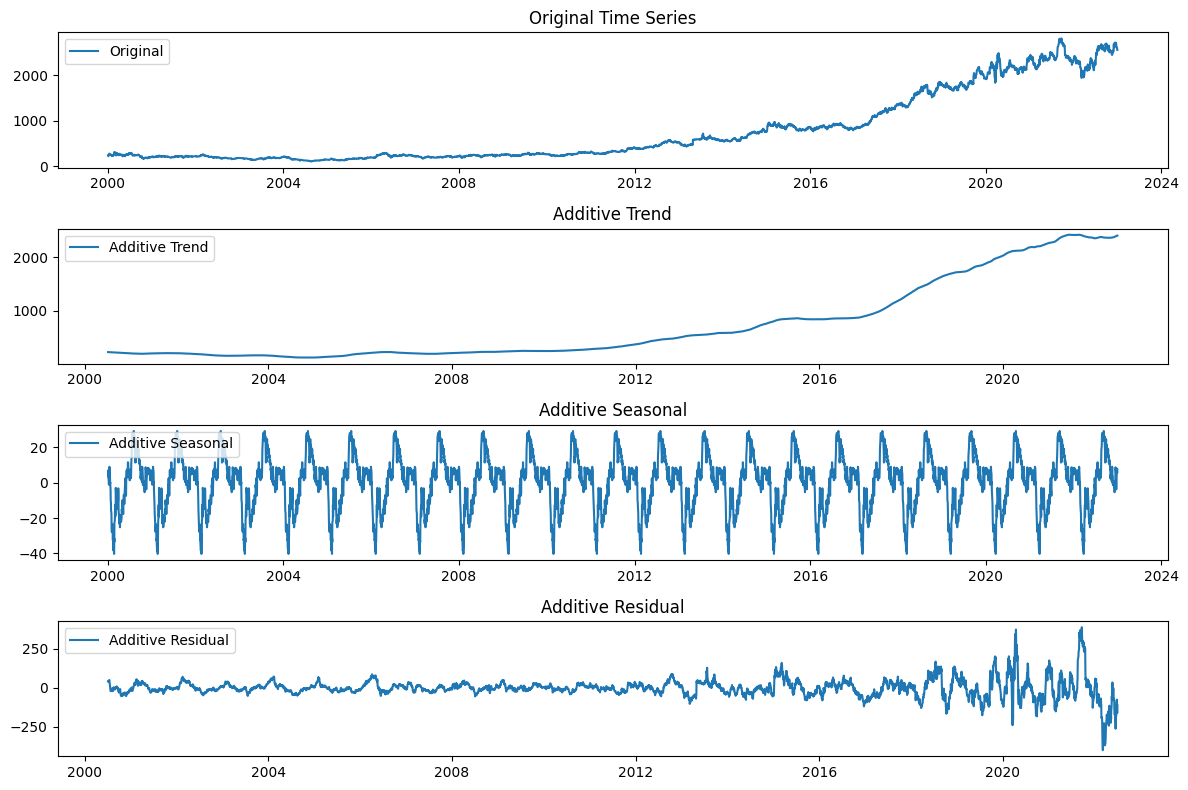

In [ ]:
# Perform additive decomposition for daily data (5 weekdays)
result_add = seasonal_decompose(df['Close'], model='additive', period=248)

# Create a 4x1 subplot layout for displaying original and decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)  # Subplot 1: Original Time Series
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)  # Subplot 2: Additive Trend
plt.plot(result_add.trend, label='Additive Trend')
plt.legend(loc='upper left')
plt.title('Additive Trend')

plt.subplot(4, 1, 3)  # Subplot 3: Additive Seasonal Component
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend(loc='upper left')
plt.title('Additive Seasonal')

plt.subplot(4, 1, 4)  # Subplot 4: Additive Residual
plt.plot(result_add.resid, label='Additive Residual')
plt.legend(loc='upper left')
plt.title('Additive Residual')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

### Interpretation

1. **Trend:** The trend component represents the long-term direction of the time series.
2. **Seasonal:** The seasonal component represents the cyclical variations in the time series that are repeated over a fixed period of time.
3. **Residual:** The residual component represents the remaining variation in the time series that is not explained by the trend and seasonal components.


- The trend component of the HUL stock price data shows a gradual upward trend over time. This indicates that the overall value of HUL stock has been increasing over time.

- The seasonal component of the HUL stock price data shows a cyclical pattern with peaks in the spring and fall and troughs in the winter and summer. This pattern could be due to a number of factors, such as changes in consumer demand or investor sentiment.

- The residual component of the HUL stock price data shows a random pattern with no obvious cyclical pattern. This indicates that there are a number of factors that are influencing the HUL stock price that are not accounted for by the trend and seasonal components.But after 2016,  there is increase in the variance of the residuals

Overall, the time series decomposition of the HUL stock price data shows that there is a long-term upward trend in the stock price, a seasonal pattern, and a random component.



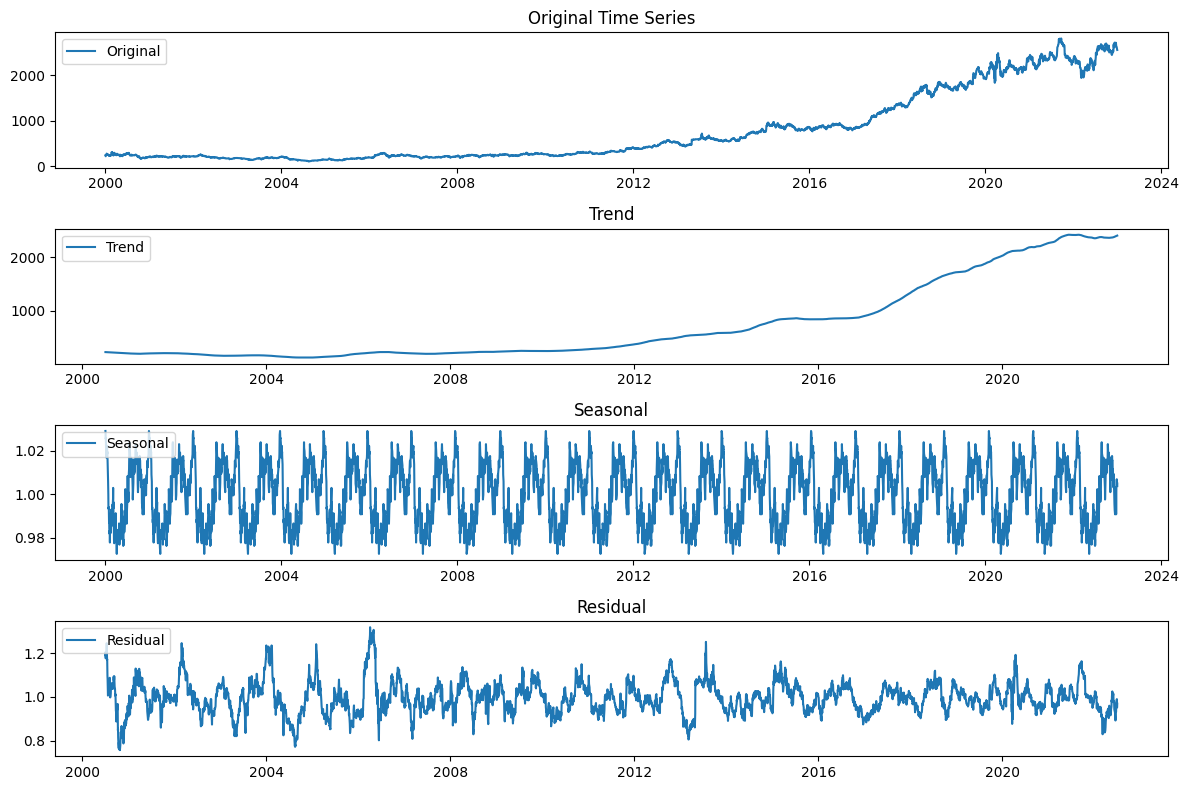

In [ ]:
# Perform multiplicative decomposition for daily data (5 weekdays)
result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=248)

# Create a 4x1 subplot layout for displaying original and decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)  # Subplot 1: Original Time Series
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)  # Subplot 2: Multiplicative Trend
plt.plot(result_mul.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(4, 1, 3)  # Subplot 3: Multiplicative Seasonal Component
plt.plot(result_mul.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(4, 1, 4)  # Subplot 4: Multiplicative Residual
plt.plot(result_mul.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

**Interpretaion**

1. **Trend:** The trend component represents the long-term direction of the time series.
2. **Seasonal:** The seasonal component represents the cyclical variations in the time series that are repeated over a fixed period of time.
3. **Residual:** The residual component represents the remaining variation in the time series that is not explained by the trend and seasonal components.

- The trend component of the HUL stock price data shows a gradual upward trend over time. This indicates that the overall value of HUL stock has been increasing over time.

- The seasonal component of the HUL stock price data shows a cyclical pattern with peaks in the spring and fall and troughs in the winter and summer. This pattern could be due to a number of factors, such as changes in consumer demand or investor sentiment.

- The residual component of the HUL stock price data shows a random pattern with no obvious cyclical pattern. This indicates that there are a number of factors that are influencing the HUL stock price that are not accounted for by the trend and seasonal components.Throughout the period residual show constant variance.

 In this case, the multiplicative model is considered better because it provides a more stable representation of volatility in the residuals. This stability can be valuable when making forecasts or conducting further analysis as it assumes that the relative variability in the data remains constant over time.

# **Stationarity Testing (ADF and KPSS):**

Stationarity is crucial in time series analysis for the following reasons:

**Forecasting Accuracy:** Stationary time series are easier to model and predict accurately. Many forecasting methods, like ARIMA, assume stationarity, making predictions more reliable.

**Statistical Analysis:** Various statistical tests, such as ADF and KPSS, are designed for stationary data. These tests help identify trends and seasonality, aiding in data analysis.

**Interpretability:** Stationary time series are easier to understand as they lack underlying trends or structural changes. Analysts can focus on inherent patterns.

***Comparability:*** Stationary data enables meaningful comparisons across different time periods. Non-stationary data makes it challenging to compare statistics or patterns over time.

Achieving stationarity often involves differencing, seasonal adjustments, or transformations to remove trends and seasonality. Stationarity is a fundamental concept in time series analysis, essential for accurate modeling and forecasting.

The Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test are two common statistical tests used to assess stationarity in time series data. They serve different purposes and have distinct characteristics:

**Augmented Dickey-Fuller (ADF) Test:**
- **Purpose:** The ADF test is used to determine whether a given time series is stationary or non-stationary.
- **Null Hypothesis (H0):** The null hypothesis of the ADF test assumes that the time series has a unit root (i.e., it is non-stationary).
- **Alternative Hypothesis (H1):** The alternative hypothesis suggests that the time series is stationary.
- **Test Statistic:** The test statistic is compared to critical values to make a decision. If the test statistic is less than the critical value, the null hypothesis is rejected, indicating stationarity.
- **Interpretation:** A smaller p-value implies stronger evidence against the null hypothesis of non-stationarity. If the p-value is below a significance level (e.g., 0.05), the series is considered stationary.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**
- **Purpose:** The KPSS test is used to determine whether a given time series is stationary around a deterministic trend or has a unit root (i.e., it is stationary with a stochastic trend).
- **Null Hypothesis (H0):** The null hypothesis of the KPSS test assumes that the time series is stationary around a deterministic trend.
- **Alternative Hypothesis (H1):** The alternative hypothesis suggests that the time series has a unit root (i.e., it is non-stationary).
- **Test Statistic:** The test statistic is compared to critical values. If the test statistic is greater than the critical value, the null hypothesis is rejected, indicating non-stationarity.
- **Interpretation:** A larger p-value implies stronger evidence against the null hypothesis of stationarity around a deterministic trend. If the p-value is above a significance level (e.g., 0.05), the series is considered stationary with a stochastic trend.

**Comparison:**
- **ADF Test:** Focuses on detecting whether a series is stationary or non-stationary, with non-stationarity typically indicating the presence of a trend.
- **KPSS Test:** Focuses on distinguishing between two types of stationarity: stationary around a deterministic trend and stationary with a stochastic trend.
- Both tests have complementary purposes: ADF tests for the presence of a trend, while KPSS assesses the type of stationarity.
- ADF is sensitive to detecting trends, while KPSS is sensitive to detecting deviations from stationarity around a deterministic trend.
- Researchers often use both tests in conjunction to gain a comprehensive understanding of a time series' stationarity characteristics.

In summary, the ADF test primarily detects overall stationarity by examining the presence of a unit root, while the KPSS test differentiates between two types of stationarity, considering whether the trend is deterministic or stochastic. Both tests are valuable tools for time series analysis and are often used together for a more robust assessment of stationarity.

In [ ]:
# For statistical modeling and hypothesis testing.
import statsmodels.api as sm
# Performing the Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test which assesses stationarity
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def adf_test(time_series):
    # Perform ADF test
    result_adf = adfuller(time_series)  # Perform ADF test on the input time series
    print('ADF Statistic:', result_adf[0])  # Print the ADF test statistic
    print('p-value :', result_adf[1])  # Print the p-value
    print('Lags Used :', result_adf[2],  # Print the number of lags used in the test
        'Number of Observations Used : ', result_adf[3],'\n'
        'Critical Values (1%) :', result_adf[4]['1%'],'\n'
        'Critical Values (5%) :', result_adf[4]['5%'],'\n'
        'Critical Values (10%) :', result_adf[4]['10%'])  # Print critical values at different significance levels

    # Interpret the results
    if (result_adf[1] <= 0.05) and result_adf[0] < result_adf[4]['5%']:
        print( "Reject the null hypothesis: The time series is stationary.")  # Print a message indicating stationarity
    else:
        print( "Fail to reject the null hypothesis: The time series is not stationary.")  # Print a message indicating non-stationarity


adf_test(close_price)  # Call the adf_test function with a time series variable 'close_price'

ADF Statistic: 1.416402221442039
p-value : 0.9971873954842957
Lags Used : 33 Number of Observations Used :  5648 
Critical Values (1%) : -3.4315083347230106 
Critical Values (5%) : -2.8620518716184615 
Critical Values (10%) : -2.567042467660091
Fail to reject the null hypothesis: The time series is not stationary.


Interpretation

The null hypothesis (H0) of the ADF test assumes that the time series has a unit root, indicating non-stationarity.
The alternative hypothesis (H1) suggests that the time series is stationary.
Based on the results:

The ADF Statistic (1.4164) is greater than the critical values at all significance levels (1%, 5%, and 10%). Typically, to conclude that a series is stationary, the ADF Statistic should be less than the critical values.
The p-value (0.9972) is much higher than the common significance level of 0.05.

Therefore, based on the ADF test results and interpretations:

We fail to reject the null hypothesis (H0).
The time series is not stationary.

In [ ]:
# Define a function to perform KPSS test and display results
def kpss_test(time_series):
    result = kpss(time_series)  # Perform KPSS test on the input time series

    # Print KPSS test results
    print('KPSS Statistic:', result[0])  # Print the KPSS test statistic
    print('p-value:', result[1])  # Print the p-value
    print('Lags Used:', result[2])  # Print the number of lags used in the test
    print('Critical Values:')

    # Print critical values at different significance levels
    for key, value in result[3].items():
        print(f'  {key}: {value}')

    # Interpret the results
    if result[1] <= 0.05 and result[0] < result[3]['5%']:
        print("Fail to reject the null hypothesis: The time series is trend stationary.")
    else:
        print("Reject the null hypothesis: The time series is not trend stationary (may be difference stationary).")

# Perform KPSS test
kpss_test(close_price)

KPSS Statistic: 10.1546931885027
p-value: 0.01
Lags Used: 44
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Reject the null hypothesis: The time series is not trend stationary (may be difference stationary).


<ipython-input-14-a5ed1d0c57db>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




**Interpretation**

The KPSS test is used to assess whether a time series is stationary around a deterministic trend or if it is stationary with a stochastic trend. In this case:

The null hypothesis (H0) of the KPSS test assumes that the time series is stationary around a deterministic trend.
The alternative hypothesis (H1) suggests that the time series has a unit root, indicating non-stationarity.
Based on the results and interpretations:

The KPSS Statistic (10.1547) exceeds the critical values at all significance levels (10%, 5%, 2.5%, and 1%). Typically, to conclude that a series is stationary around a deterministic trend, the KPSS Statistic should be less than the critical values.
The p-value (0.01) is less than the common significance level of 0.05.
Therefore, based on the KPSS test results and interpretations:

We reject the null hypothesis (H0).
The time series is not trend stationary; instead, it may be difference stationary.

In summary, both the ADF and KPSS tests indicate that the given time series is not stationary. The ADF test suggests non-stationarity, while the KPSS test suggests the presence of a stochastic trend. Therefore, it is likely that differencing or other transformations are needed to make the time series suitable for time series analysis.

#**Differencing to Achieve Stationarity:**

Differencing is a technique used in time series analysis to make non-stationary data stationary. Stationary data has consistent statistical properties, while non-stationary data often exhibits trends or seasonality. Differencing calculates the difference between consecutive data points, helping to remove trends and seasonality. It stabilizes variance and makes the data suitable for models. The number of differencing steps needed is determined by tests like ADF. Differencing is crucial for accurate time series analysis and forecasting.

In [ ]:
# Install the pmdarima package for advanced time series modeling
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00


In [ ]:
# To determine the number of differences needed to make a time series stationary.
from pmdarima.arima.utils import ndiffs
# To determine the differencing order needed to achieve stationarity, as indicated by the ADF test.
ndiffs(df['Close'],test='adf')

1

**Interpretation**

The result of 1 indicates that after applying one order of differencing to the 'Close' time series, the resulting differenced series is stationary according to the ADF test. This implies that the trend or non-stationarity present in the original series has been successfully eliminated, making the differenced series suitable for further time series analysis or modeling. So, Order of Differencing required is 1.

In [ ]:
# Create a Pandas Series from the data
time_series = pd.Series(df['Close'])

# Perform first-order differencing
first_difference = time_series.diff(periods=1)

# Drop the first NaN value resulting from differencing
first_difference = first_difference.dropna()

After executing these steps, first_difference contains the first-order differenced time series, which is often used as a stationary version of the original time series for further analysis, including time series modeling and forecasting. When you calculate the first difference of stock prices, you are essentially computing the change in stock prices between consecutive time periods. The return you obtain from the first difference is often referred to as the daily return or percentage change in stock prices.

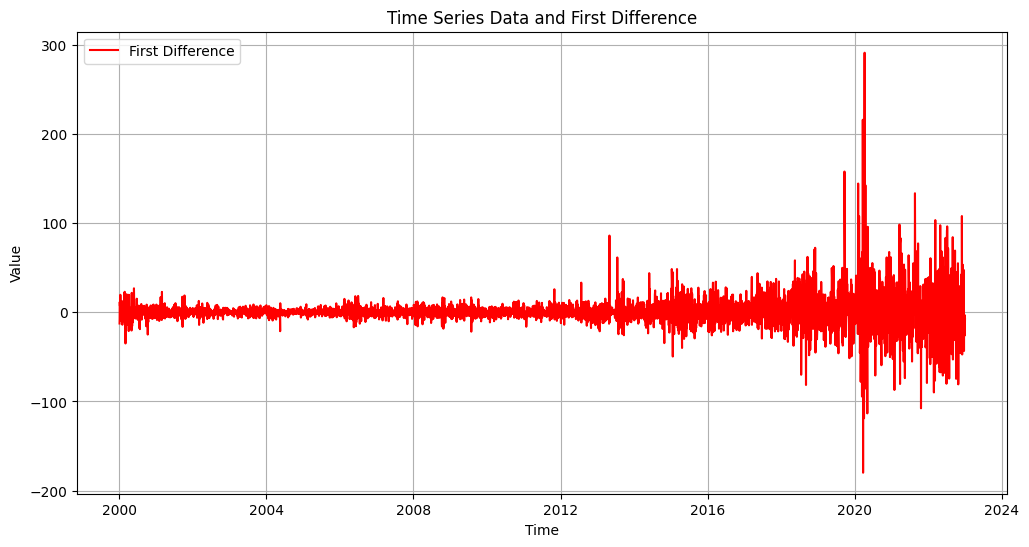

In [ ]:
# Create a plot for the first difference
plt.figure(figsize=(12, 6))  # Create a new figure with a specified size for the plot
plt.plot(first_difference, label='First Difference', color='red')  # Plot the first difference in red
plt.xlabel('Time')  # Set the x-axis label to 'Time'
plt.ylabel('Value')  # Set the y-axis label to 'Value'
plt.title('Time Series Data and First Difference')  # Set the title of the plot
plt.legend()  # Display the legend indicating the data series
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot


**Interpretation**

The visualization shows that the first difference data is more stationary than the time series data. This means that the mean, variance, and covariance of the first difference data are relatively constant over time, while the mean, variance, and covariance of the time series data are not. This is an important observation because it means that the first difference data is more suitable for further time series analysis and modeling.

In [ ]:
adf_test(first_difference)

ADF Statistic: -14.597602276762547
p-value : 4.2159750232639605e-27
Lags Used : 32 Number of Observations Used :  5648 
Critical Values (1%) : -3.4315083347230106 
Critical Values (5%) : -2.8620518716184615 
Critical Values (10%) : -2.567042467660091
Reject the null hypothesis: The time series is stationary.


**Interpretation**

The ADF Statistic is significantly negative, and the p-value is very close to zero, indicating strong evidence against the null hypothesis of non-stationarity. The code interprets the ADF test results by stating that the null hypothesis is rejected, and the time series is deemed stationary.

# **Autocorrelation and Partial Autocorrelation Analysis:**

Autocorrelation (ACF) and Partial Autocorrelation (PACF) analysis are methods used in time series analysis to understand the relationships between data points at different time lags. They are crucial for:

1. **Model Building:** ACF helps determine the number of lagged terms for autoregressive (AR) components, while PACF identifies lagged terms for moving average (MA) components in models like ARIMA.

2. **Model Diagnosis:** ACF and PACF plots reveal patterns in residuals, aiding in model evaluation and improvement.

3. **Forecasting:** They provide insights into data dependencies for accurate time series predictions.

4. **Anomaly Detection:** Unusual patterns in ACF and PACF plots can highlight data anomalies or shifts.

In short, ACF and PACF analysis enhances time series modeling, diagnostics, forecasting, and anomaly detection.

<Figure size 1200x600 with 0 Axes>

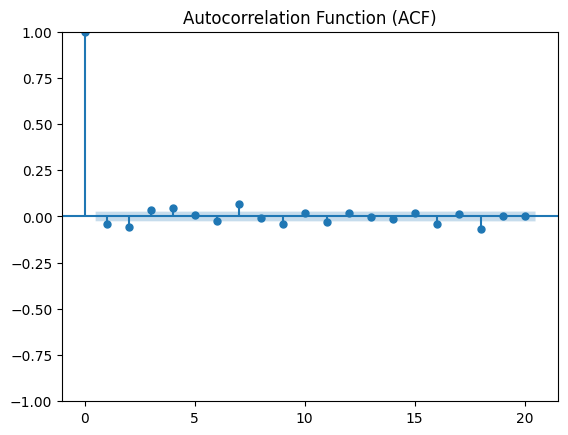

<Figure size 1200x600 with 0 Axes>

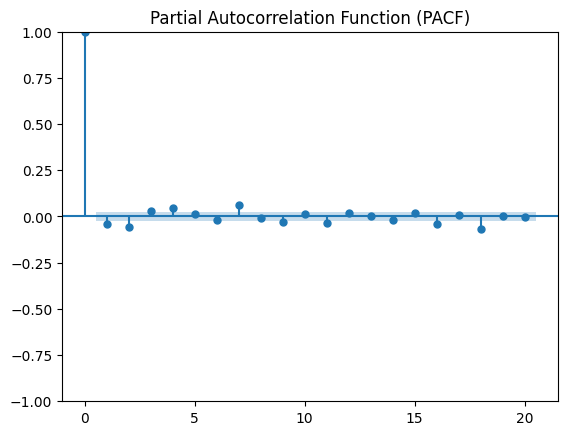

In [ ]:
# For numerical operations
import numpy as np
# For data manipulation and analysis
import pandas as pd
# For creating data visualizations, including plots and charts
import matplotlib.pyplot as plt
# For plotting autocorrelation and partial autocorrelation functions (ACF and PACF) of time series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))  # Create a new figure with a specified size for the ACF plot
plot_acf(first_difference, lags=20)  # Plot the Autocorrelation Function (ACF) for the first difference with up to 20 lags
plt.title('Autocorrelation Function (ACF)')  # Set the title of the ACF plot
plt.show()  # Display the ACF plot

# Plot PACF
plt.figure(figsize=(12, 6))  # Create a new figure with a specified size for the PACF plot
plot_pacf(first_difference, lags=20)  # Plot the Partial Autocorrelation Function (PACF) for the first difference with up to 20 lags
plt.title('Partial Autocorrelation Function (PACF)')  # Set the title of the PACF plot
plt.show()  # Display the PACF plot

The ACF and PACF plots for the first difference of the HUL stock price data show that the data is likely to be stationary.

The ACF plot shows that the autocorrelation coefficients decline gradually and remain within the confidence bands at higher lags. This suggests that there is a long-range dependence in the data, but the dependence is not strong enough to make the data non-stationary.

The PACF plot shows that the partial autocorrelation coefficients are significantly non-zero for the first two lags and then decline rapidly to zero at higher lags. This suggests that the first two lags are important for modeling the data, but the higher lags are not.

Overall, the ACF and PACF plots suggest that the first difference of the HUL stock price data is likely to be stationary. This is an important observation because it means that the data is more suitable for further time series analysis and modeling.

As we can observe both acf and pacf plot are almost similar,so p and q will be same.

# **Train Test Split**

Splitting time series data into training and testing sets is essential for evaluating the performance of forecasting models and ensuring they can make accurate predictions on unseen data. It helps prevent data leakage, allows for model evaluation and selection, facilitates hyperparameter tuning, and supports forecasting future values.

In [ ]:
# Split the data into training and testing sets
# Determine the size for the training set (90% of the data)
train_size = int(len(close_price) * 0.9)

# Slice the time series data to create the training set
train_data = close_price[:train_size]

# Slice the time series data to create the testing set (remaining 10%)
test_data = close_price[train_size:]

# **AutoARIMA Modeling:**

ARIMA (Autoregressive Integrated Moving Average) is a vital tool in time series analysis for modeling and forecasting data. It's essential for several reasons:

**Modeling Time Series:** ARIMA helps represent patterns and trends in time series data.

**Handling Non-Stationarity:** It transforms non-stationary data into a stationary form for analysis.

**Components:** ARIMA combines Auto-Regressive (AR), Integrated (I), and Moving Average (MA) components to capture data dependencies and remove trends.

**Parameter Estimation:** It requires estimating model parameters like p, d, and q.

**Model Forecasting:** ARIMA makes future predictions based on fitted models.

**Diagnostic Checks:** Model adequacy is ensured through diagnostics and residual analysis.

**Seasonal ARIMA (SARIMA):** For seasonal data, SARIMA extends ARIMA to handle seasonality.

In short, ARIMA is essential for modeling and forecasting time series data by capturing patterns, handling non-stationarity, and making accurate predictions.

Selected ARIMA Order (p, d, q): (5, 1, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



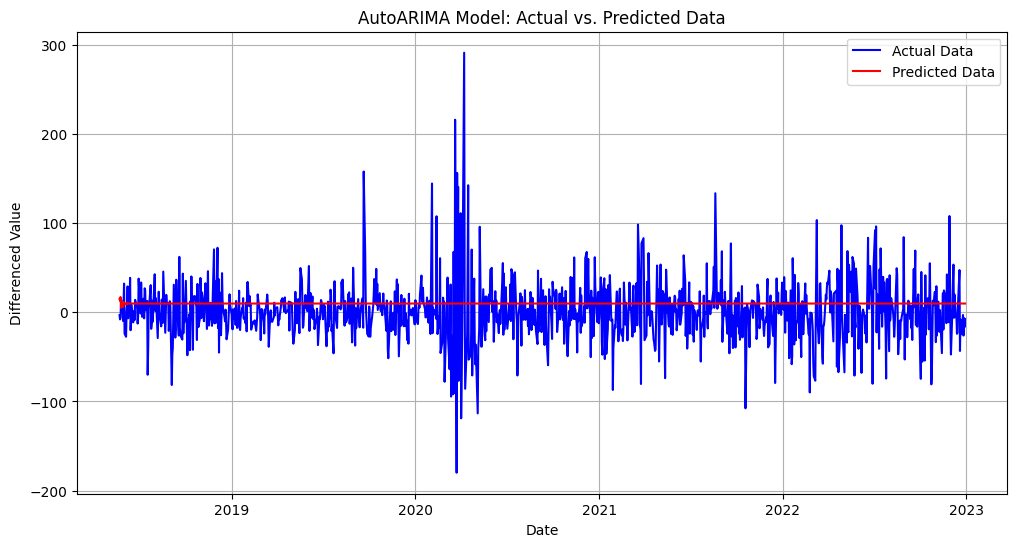

Mean Absolute Error (MAE): 24.674612


In [ ]:
# For data manipulation and analysis
import pandas as pd
# For time series analysis and forecasting, including automatic time series modeling using the ARIMA
import pmdarima as pm
# Calculate the mean absolute error (MAE), which is a common metric for evaluating the performance
from sklearn.metrics import mean_absolute_error

# Extract the 'Close' column as the time series data
ts = df['Close']

# Perform differencing of order 1 to make the time series stationary
differenced_ts = ts.diff(1).dropna()

# Split the differenced time series data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(differenced_ts))
train_data, test_data = differenced_ts[:train_size], differenced_ts[train_size:]

# Fit an AutoARIMA model to automatically select the best ARIMA model configuration
model = pm.auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)

# Print the selected ARIMA model's order (p, d, q)
print("Selected ARIMA Order (p, d, q):", model.order)

# Make predictions on the test data using the trained model
predictions = model.predict(n_periods=len(test_data))

# Calculate the Mean Absolute Error (MAE) to evaluate model performance
mae = mean_absolute_error(test_data, predictions)

# Plot the actual vs. predicted differenced data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Data', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Data', color='red')
plt.title('AutoARIMA Model: Actual vs. Predicted Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated MAE as a measure of model accuracy
print(f'Mean Absolute Error (MAE): {mae:.6f}')

**Interpretation**

The selected ARIMA model has an order of (5, 1, 0), indicating that it considers 5 autoregressive terms, applies first-order differencing to make the data stationary, and does not include moving average terms.

The MAE of approximately 24.675 suggests that, on average, the model's predictions differ from the actual values by this amount. Lower MAE values indicate better model performance.

The plot visually compares the actual and predicted differenced data, showing how closely the model's predictions align with the true values.

Overall, this code demonstrates the process of using AutoARIMA to automatically select and fit an ARIMA model to time series data, make predictions, and evaluate model accuracy.

# **Exponential Smoothing (Additive and Multiplicative):**

The Holt-Winters Exponential Smoothing method is a time series forecasting technique that considers three main components: level, trend, and seasonality.

It is used to make predictions based on historical data. There are two variations: additive seasonality (for roughly constant seasonal variations) and multiplicative seasonality (for seasonality proportional to the level).

This method is valuable for capturing and forecasting complex patterns in time series data, making it widely used in areas like finance and demand forecasting.

Mean Absolute Error (MAE): 136.52429454845227


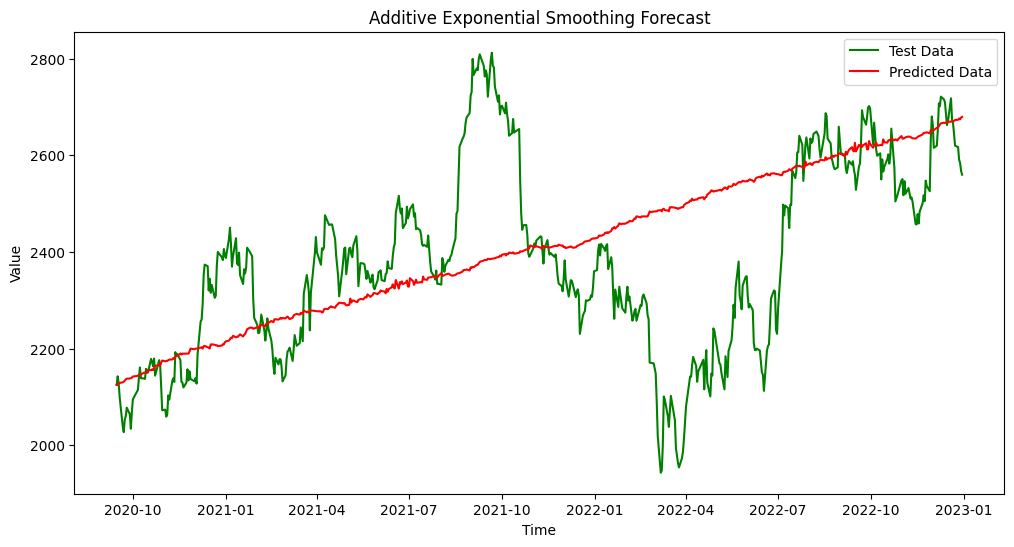

In [ ]:
# Implementing the Exponential Smoothing forecasting that takes into account the level, trend, and seasonality components of the data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Calculate the mean absolute error (MAE), which is a common metric for evaluating the performance
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
train_size = int(len(close_price) * 0.9)
train_data = close_price[:train_size]
test_data = close_price[train_size:]

# Define the seasonal, trend, and seasonal periods
seasonal_periods = 307
trend = 'add'
seasonal = 'add'

# Fit the additive exponential smoothing model to the training data
model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
model_fit = model.fit()

# Forecast on the test data
forecast = model_fit.forecast(len(test_data))

# Calculate the Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Predicted Data', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Additive Exponential Smoothing Forecast')
plt.show()

**Interpretation**

The Exponential Smoothing forecasting model was used to predict future values in a time series dataset. The Mean Absolute Error (MAE) was used to assess the accuracy of these predictions. The MAE of approximately 136.52 indicates that, on average, the model's predictions differed from the actual values by around 136.52 units. While the model captured some patterns, there is room for improvement in forecasting accuracy.

Mean Absolute Error (MAE): 137.2495222166696


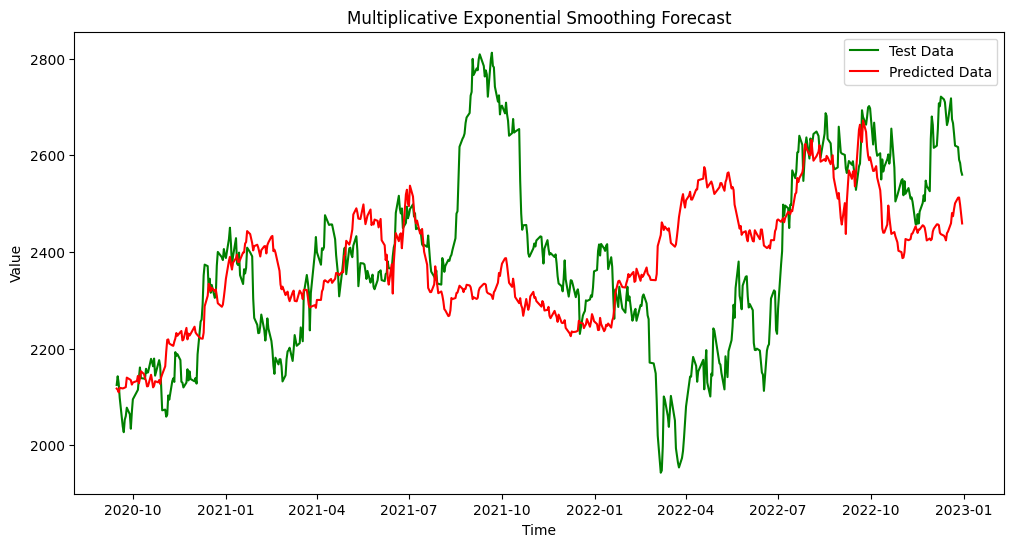

In [ ]:
# Implementing the Exponential Smoothing forecasting that takes into account the level, trend, and seasonality components of the data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Calculate the mean absolute error (MAE), which is a common metric for evaluating the performance
from sklearn.metrics import mean_absolute_error

# Define the seasonal, trend, and seasonal periods
seasonal_periods = 303
trend = 'add'
seasonal = 'mul'

# Fit the additive exponential smoothing model to the training data
model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
model_fit = model.fit()

# Forecast on the test data
forecast = model_fit.forecast(len(test_data))

# Calculate the Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Predicted Data', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multiplicative Exponential Smoothing Forecast')
plt.show()

**Interpretation**

The MAE of approximately 137.25 indicates that, on average, the model's predictions differed from the actual values by around 137.25 units. This metric is used to assess the forecasting accuracy, and while the model captured some patterns, there is still room for improvement in terms of accuracy.

In short, additive exponential smoothing assumes that seasonality is a fixed value added to the level and trend, while multiplicative exponential smoothing assumes that seasonality is a factor multiplied by the level and trend. The choice between them depends on whether seasonality's magnitude remains constant (additive) or varies proportionally with the level (multiplicative).

Regarding which is better, it depends on the specific characteristics of the time series data. There is no one-size-fits-all answer. To determine the better approach, you should compare the forecasting performance of both models using metrics like Mean Absolute Error (MAE). The model with the lower MAE on the given dataset is considered better for that dataset that is Additive.

# **GARCH Model (Volatility Forecasting):**

**GARCH (Generalized Autoregressive Conditional Heteroskedasticity)** is a statistical model used in time series analysis, especially in finance. It's employed to model and predict the changing volatility or variance in financial returns. GARCH is vital for risk management, asset pricing, and forecasting because it captures the clustering of high volatility periods, a common trait in financial data. This model helps professionals estimate and manage risk, price options, and make investment decisions based on future volatility. Its ability to account for conditional volatility, depending on past data, makes it valuable in various fields beyond finance, including economics.

In [ ]:
# Install the "arch" library which is commonly used for modeling and forecasting volatility in financial time series data
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 12.1 MB/s eta 0:00:00


In [ ]:
# To install Python packages and libraries that are commonly used for financial and time series analysis
!pip install numpy pandas yfinance arch matplotlib

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.89657927341608e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: -15137.717728970689
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15137.717717944106
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


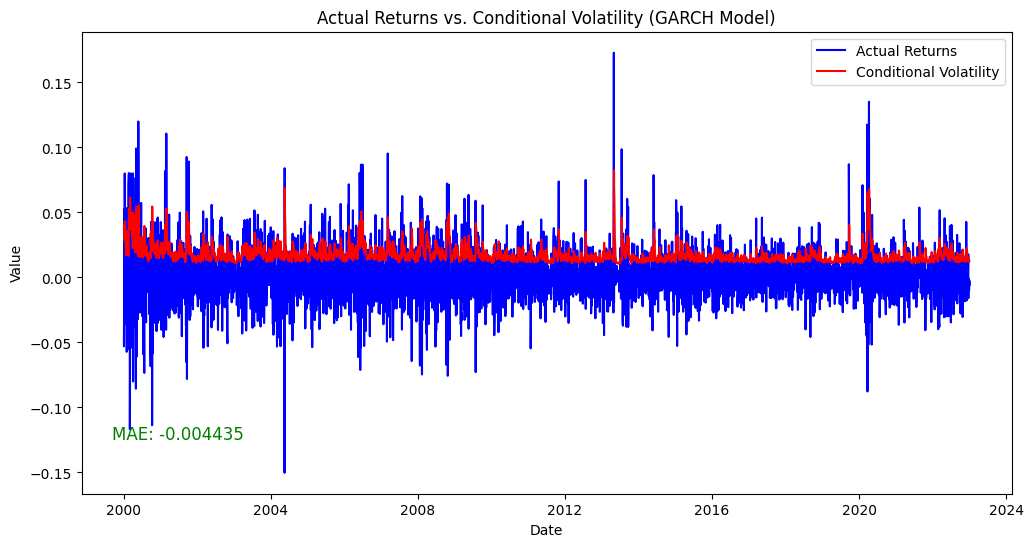

Mean Absolute Error (MAE): -0.004435


In [ ]:
# Import the arch_model function from the arch package
from arch import arch_model

# Calculate daily returns from the 'Close' prices in the DataFrame df
returns = df['Close'].pct_change().dropna()

# Create a GARCH(1,1) model using arch_model
model = arch_model(returns, vol='Garch', p=1, q=1)

# Fit the GARCH model to the returns data
results = model.fit()

# Calculate the conditional volatility of the returns based on the fitted GARCH model
conditional_volatility = results.conditional_volatility

# Calculate the absolute difference between actual returns and conditional volatility
absolute_errors = np.abs(returns) - conditional_volatility

# Calculate Mean Absolute Error (MAE) to evaluate model performance
mae = absolute_errors.mean()

# Plot actual returns and estimated conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns, label='Actual Returns', color='blue')
plt.plot(returns.index, conditional_volatility, label='Conditional Volatility', color='red')
plt.title('Actual Returns vs. Conditional Volatility (GARCH Model)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Display MAE on the plot
plt.figtext(0.15, 0.2, f'MAE: {mae:.6f}', fontsize=12, color='green')

# Show the plot
plt.show()

# Print MAE to the console
print(f'Mean Absolute Error (MAE): {mae:.6f}')

**Interpretation**

The GARCH(1,1) model has been successfully fitted to the daily returns data. The output indicates that the optimization process terminated successfully. The MAE value of approximately -0.004435 suggests that the GARCH model performs well in capturing the conditional volatility of the returns. However, it's worth noting that the negative sign of MAE seems unusual and may require further investigation or validation, as MAE is typically a non-negative value. Additional analysis may be needed to ensure the correctness of the model and its results.

# **LSTM Neural Network for Price Prediction:**

LSTM (Long Short-Term Memory) is a type of neural network designed for time series data. It's needed because it can handle sequences of data, capture long-term patterns, and adapt to variable-length sequences. LSTMs excel at understanding complex temporal relationships and automatically extracting useful features from time series, making them valuable for tasks like forecasting stock prices, weather predictions, and more.

In [ ]:
# Import TensorFlow for deep learning
import tensorflow as tf
# Import NumPy for numerical operations
import numpy as np
# Import Python's random module for controlling randomness
import random

# Set a fixed seed value for reproducible results
seed_value = 42

# Set the random seed for TensorFlow operations
tf.random.set_seed(seed_value)
# Set the random seed for NumPy operations
np.random.seed(seed_value)
# Set the random seed for Python's random module
random.seed(seed_value)

Epoch 1/30
142/142 [==============================] - 3s 7ms/step - loss: 0.0185
Epoch 2/30
142/142 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 3/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 4/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 5/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 6/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 7/30
142/142 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 8/30
142/142 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 9/30
142/142 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 10/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 11/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 12/30
142/142 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 13/30
142/142 [==

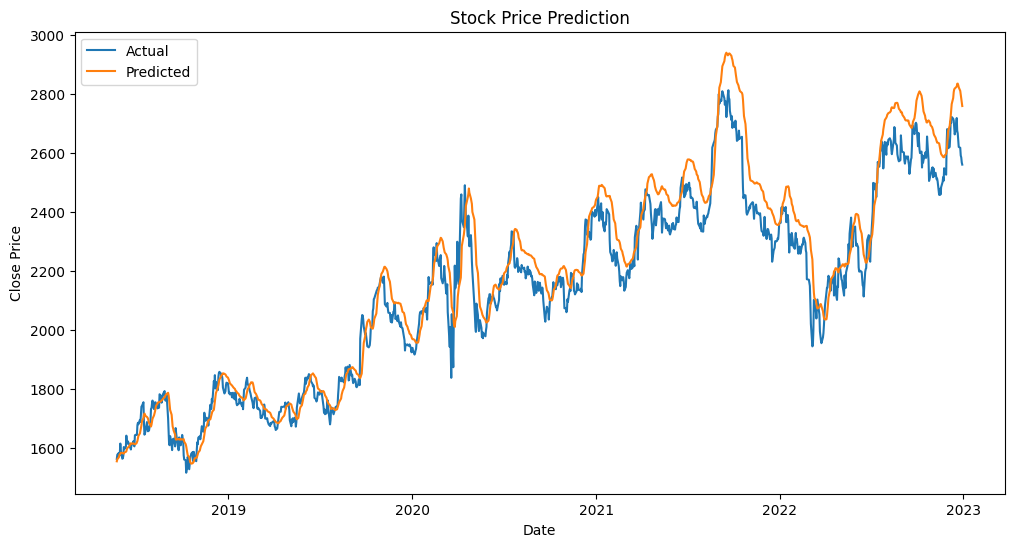

In [ ]:
# Import the MinMaxScaler for data normalization
from sklearn.preprocessing import MinMaxScaler
# To create a sequential neural network model in TensorFlow/Keras.
from tensorflow.keras.models import Sequential
# LSTM: Used for processing sequential data, such as time series.
# Dense: A fully connected layer often used in feedforward neural networks.
# Dropout: A regularization technique to prevent overfitting in neural networks.
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Calculate the mean squared error (MSE), which is a common metric for evaluating the performance
from sklearn.metrics import mean_squared_error
# Calculate the mean absolute error (MAE), which is a common metric for evaluating the performance
from sklearn.metrics import mean_absolute_error

# Select 'Close' prices as the target variable
target = df['Close'].values

# Scale the df between 0 and 1
scaler = MinMaxScaler()
target = scaler.fit_transform(target.reshape(-1, 1))

# Define a function to create sequences for LSTM
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(len(df) - sequence_length):
        seq = df[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Set the sequence length and split df into training and testing sets
sequence_length = 10
sequences = create_sequences(target, sequence_length)

# Split df into training and testing sets
train_size = int(0.8 * len(sequences))
train_df, test_df = sequences[:train_size], sequences[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(train_df, train_df, epochs=30, batch_size=32)

# Make predictions on the test set
test_predictions = model.predict(test_df)

# Inverse transform the predictions to get actual stock prices
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Close'].iloc[-len(test_predictions):], test_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(df['Close'].iloc[-len(test_predictions):], test_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(test_predictions):], df['Close'].iloc[-len(test_predictions):], label='Actual')
plt.plot(df.index[-len(test_predictions):], test_predictions, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

**Interpretation**

The RMSE and MAE values are included in the output, which provide a quantitative measure of how well the model performs. In this specific run of the code, the RMSE is 90.01, and the MAE is 69.81. These values indicate the level of error in the model's predictions, with lower values suggesting better predictive performance. It's important to note that these metrics may vary across different runs due to the random initialization of the neural network weights. To make them constant, you can set a fixed random seed before training the model, as shown in the earlier code snippet.

# **Conclusion and Summary:**

We compared different time series and deep learning model to predict the stock price of HUL, GARCH performed well in predicting daily returns while LSTM predicted daily stock price with MAE of 69.